This is a notebook that analyzes the files created to describe the dataset before the quality control step.

The files were created using commands:

1. Data description -> General distribution of depth, missingness, heterozygosity (.vchk file output)
bcftools stats joint.hg38.vcf.gz > joint.hg38.vchk

2. Generate a summary of the number of SNPs and Ts/Tv ratio for each FILTER category. (.FILTER.summary file output)
vcftools --gzvcf joint.hg38.vcf.gz --FILTER-summary --out joint.hg38.PRE-QC
 
3. Site missingness -> Generate a file reporting the missingness on a per-site basis. (.lmiss file output)
vcftools --gzvcf joint.hg38.vcf.gz --missing-site --out joint.hg38.PRE-QC

4. Individual missingness -> Generate a file reporting the missingness on a per-individual basis.(.imiss file output)
vcftools --gzvcf joint.hg38.vcf.gz --missing-indv --out joint.hg38.PRE-QC

5. Site depth -> Generate a file containing the mean depth per site across all individuals. (ldepth.mean file output)
vcftools --gzvcf joint.hg38.vcf.gz --site-mean-depth --out joint.hg38.PRE-QC 

6. Individual depth -> Generate a file containing the mean depth per individual. (.idepth file output)
vcftools --gzvcf joint.hg38.vcf.gz --depth --out joint.hg38.PRE-QC

7. Individual heterozygosity (.het file output)
vcftools --gzvcf joint.hg38.vcf.gz --het --out joint.hg38.PRE-QC

bcftools version: 1.9-94-g9589876
vcftools version: 0.1.15

Short summary of what we expect to learn from each file

1. vchk : stats by non-reference allele frequency, depth distribution, stats by quality and per-sample counts, singleton stats, etc. are included in this file

2. FILTER.summary : Generates a summary of the number of SNPs and Ts/Tv ratio for each FILTER category

3. lmiss : reports the missingness on a per-site basis

4. imiss : reports the missingness on a per-individual basis

5. ldepth.mean : contains the mean depth per site averaged across all individuals

6. idepth : contains the mean depth per individual

7. het : Calculates a measure of heterozygosity on a per-individual basis. Specfically, the inbreeding coefficient, F, is estimated for each individual using a method of moments

In [8]:
# Import relevant libraries

import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
# Check the mean depth per chromosome using ldepth.mean file
# Does each chromosome have similar mean depth or is there a variation? 
# Are there regions in each chromosomes that have smaller mean depth than other?


notebook_path = os.path.abspath("preQC_general_analysis.ipynb")
depth_file_path = os.path.join(os.path.dirname(notebook_path), "data/joint.hg38.PRE-QC.ldepth.mean")

# Read the mean depth file and divide the info into chromosomes.
per_chr_depth = {}
with open(depth_file_path, 'r') as f:
    f.readline()  # skip header
    for line in f:
        ch, depth = line.split('\t')[0][3:], float(line.split('\t')[2])
        if ch not in per_chr_depth.keys():
            print(ch)
            per_chr_depth[ch] = [depth]
        else:
            per_chr_depth[ch].append(depth)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y


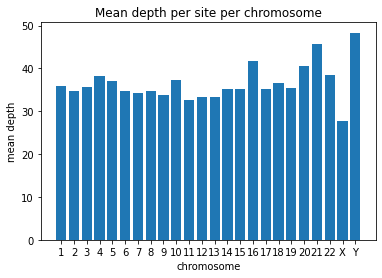

In [23]:
# Plot the mean depth of each chromosome 
plt.bar(list (per_chr_depth.keys()),[np.mean(per_chr_depth[i]) for i in per_chr_depth.keys()])
plt.title('Mean depth per site per chromosome')
plt.xlabel('chromosome')
plt.ylabel('mean depth')
plt.show()